In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # might use one of these

# Bank dataset

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [72]:
bank_dtype = {'numeric': [0, 5, 9, 11, 12, 13, 14], 
            'categorical': [1, 2, 3, 8, 10, 15], 
            'binary': [4, 6, 7, 16]}

In [73]:
bank = pd.read_csv('datasets/bank.csv', sep=';')
bank.head() # label is bank.y

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [74]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<Figure size 1200x800 with 0 Axes>

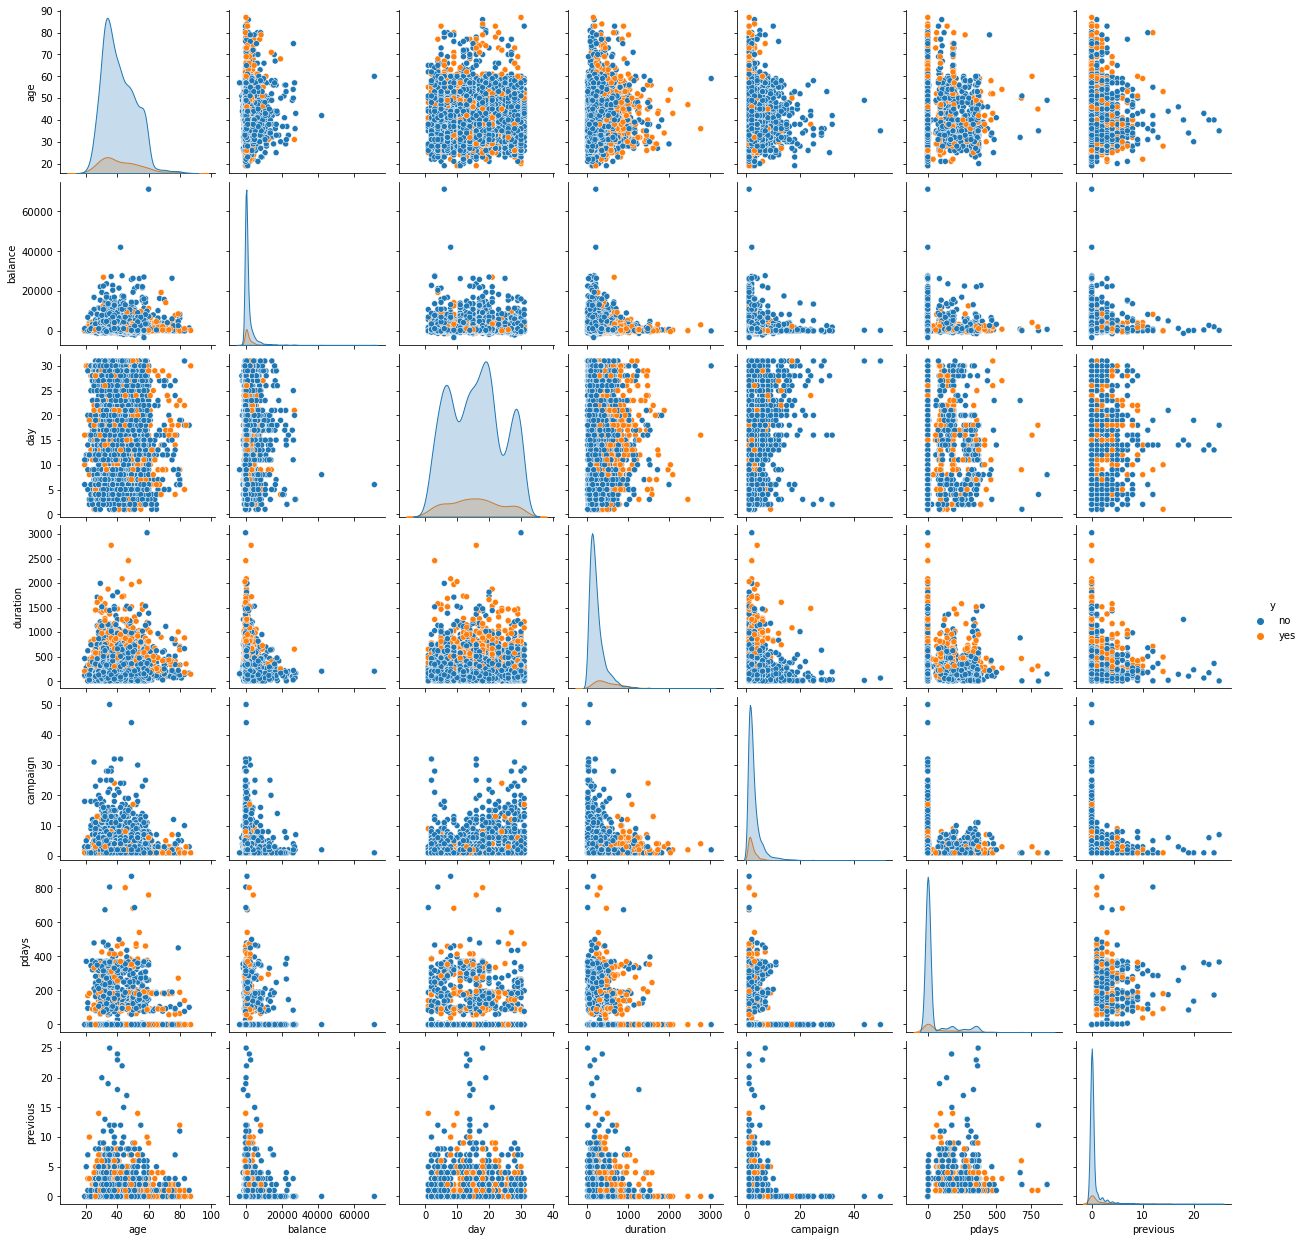

In [40]:
plt.figure(dpi=200)
sns.pairplot(bank, hue='y');

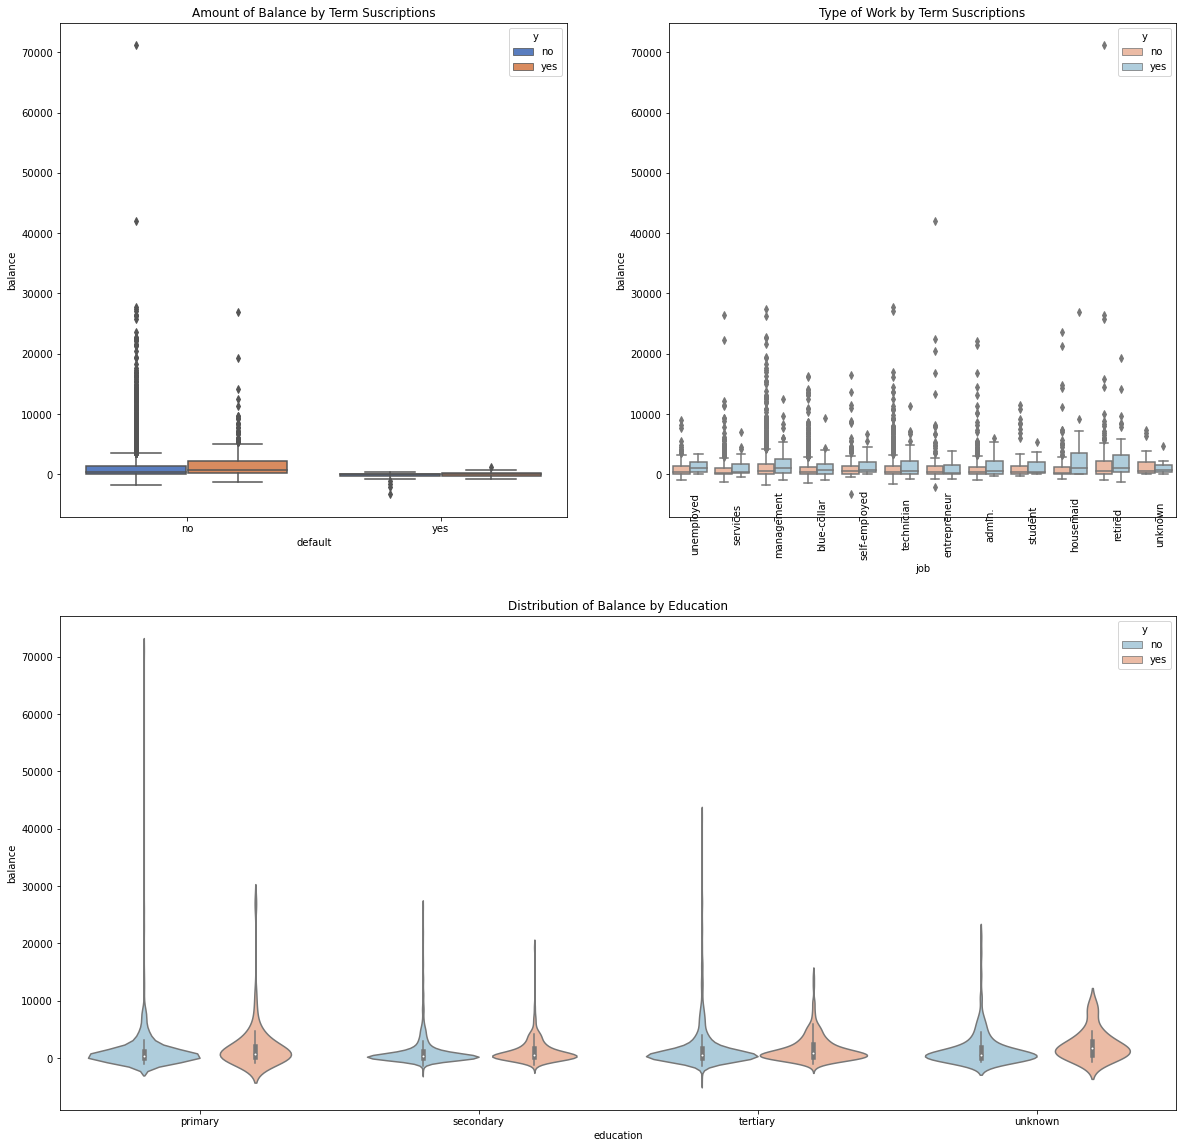

In [42]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="y",
                    data=bank, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

g1 = sns.boxplot(x="job", y="balance", hue="y",
                 data=bank, palette="RdBu", ax=ax2)

g1.set_xticklabels(bank["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bank, x="education", y="balance", hue="y", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")
plt.show()

# Avocado

In [69]:
avocado = pd.read_csv('datasets/avocado.csv', index_col=0)
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado_dtype = {'numeric': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
                'categorical': [10, 11], 
                'binary': [10]}

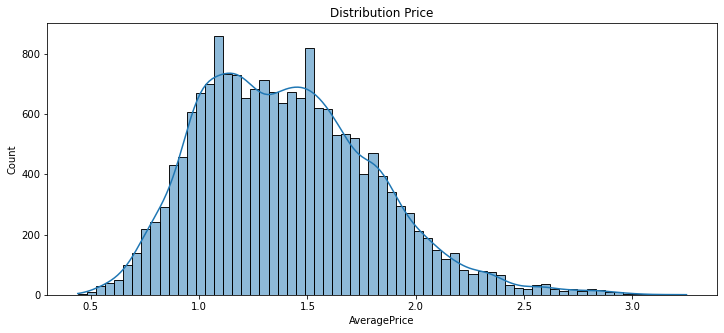

In [55]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.histplot(avocado["AveragePrice"], kde=True)

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

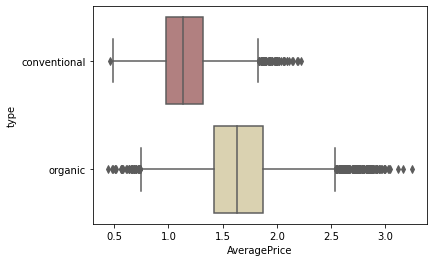

In [48]:
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

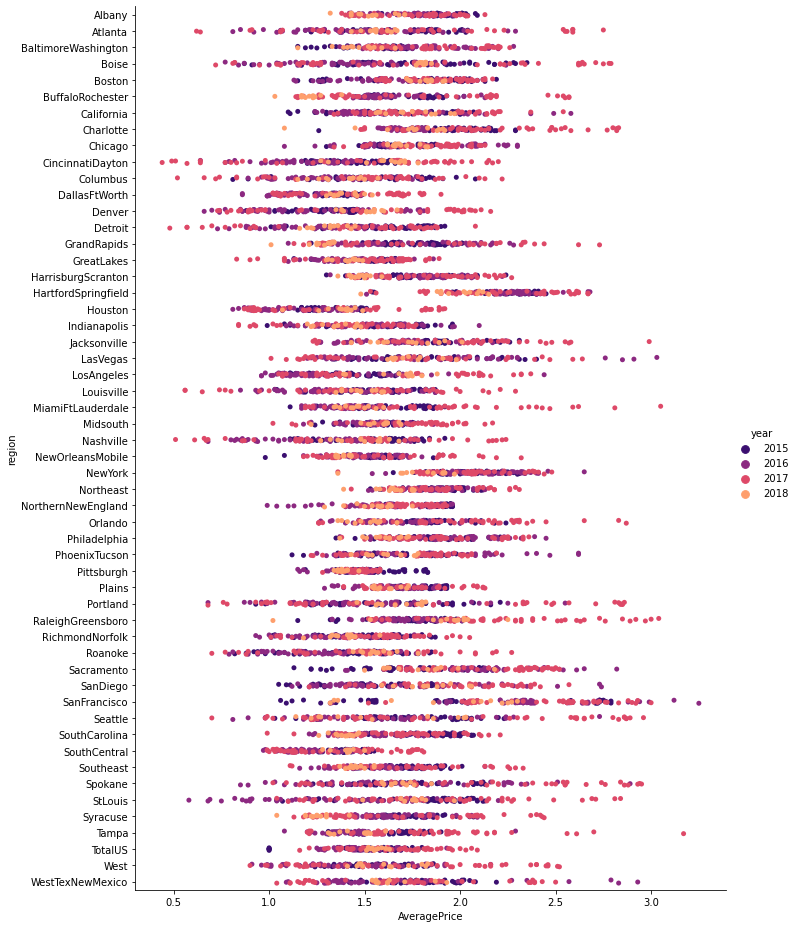

In [61]:
mask = avocado['type']=='organic'
g = sns.catplot(x='AveragePrice',y='region',data=avocado[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma'
              )

# Energy 

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [34]:
energy = pd.read_csv('datasets/energy.csv')
energy.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height','orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

energy.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [36]:
energy.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
energy_dtype = {'numeric': [0, 1, 2, 3, 4, 8, 9], 
                'categorical': [5, 6, 7], 
                'binary': []}

<AxesSubplot:xlabel='cooling_load', ylabel='Count'>

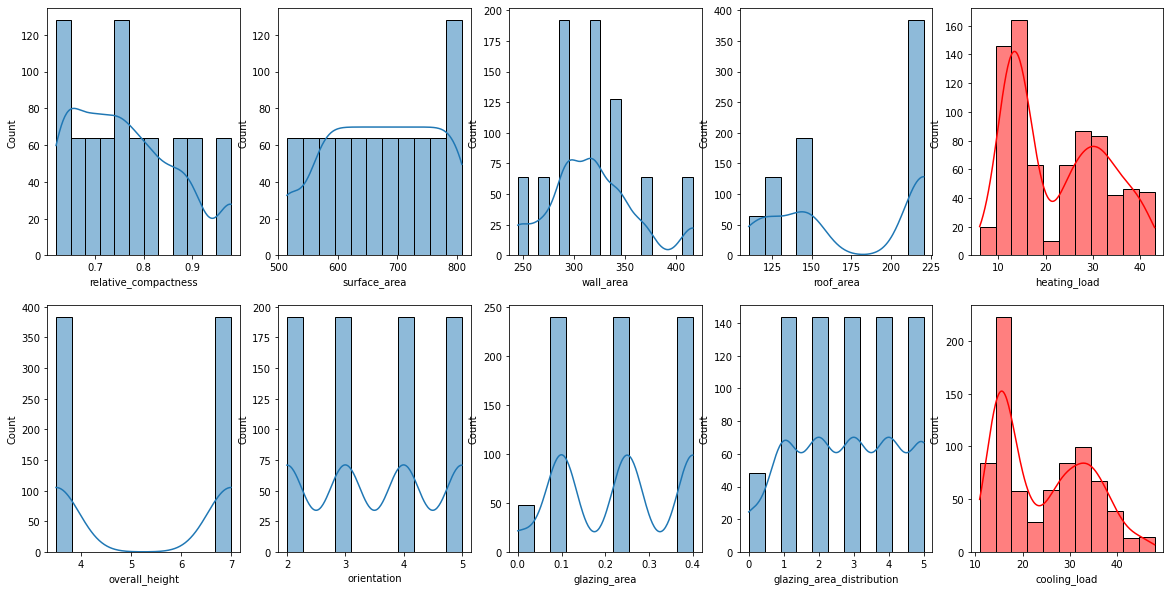

In [81]:
# for some reason, pairplot doesn't work with this dataset
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
sns.histplot(energy['relative_compactness'], kde=True,ax=ax[0,0])
sns.histplot(energy.surface_area, kde=True,ax=ax[0,1])
sns.histplot(energy.wall_area, kde=True,ax=ax[0,2])
sns.histplot(energy.roof_area, kde=True,ax=ax[0,3])
sns.histplot(energy.overall_height, kde=True,ax=ax[1,0])
sns.histplot(energy.orientation, kde=True,ax=ax[1,1])
sns.histplot(energy.glazing_area, kde=True,ax=ax[1,2])
sns.histplot(energy.glazing_area_distribution, kde=True,ax=ax[1,3])
sns.histplot(energy.heating_load, kde=True,ax=ax[0,4],color='r')
sns.histplot(energy.cooling_load, kde=True,ax=ax[1,4],color='r')

# Boston housing
MEDV is the target variable

In [157]:
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [12]:
boston.dropna(inplace=True)
boston.to_csv('datasets/boston.csv', index=False)

In [13]:
boston.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [105]:
boston_dtype = {'numeric': [0, 1, 2, 4,5,6,7,8,9,10,11,12,13], 
                'categorical': [3],
                'binary': [3]}

In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435972,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
desc =   """CRIM     per capita crime rate by town
            ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
            INDUS    proportion of non-retail business acres per town
            CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
            NOX      nitric oxides concentration (parts per 10 million)
            RM       average number of rooms per dwelling
            AGE      proportion of owner-occupied units built prior to 1940
            DIS      weighted distances to five Boston employment centres
            RAD      index of accessibility to radial highways
            TAX      full-value property-tax rate per $10,000
            PTRATIO  pupil-teacher ratio by town
            B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
            LSTAT    % lower status of the population
            MEDV     Median value of owner-occupied homes in $1000's"""
pd.DataFrame([{'feature': line[:9].strip(), 'description': line[9:]} for line in desc.split('\n')])

,feature,description
0,CRIM,per capita crime rate by town
1,,ZN proportion of residential land zon...
2,,INDUS proportion of non-retail business ...
3,,CHAS Charles River dummy variable (= 1 ...
4,,NOX nitric oxides concentration (parts...
5,,RM average number of rooms per dwelling
6,,AGE proportion of owner-occupied units...
7,,DIS weighted distances to five Boston ...
8,,RAD index of accessibility to radial h...
9,,TAX full-value property-tax rate per $...


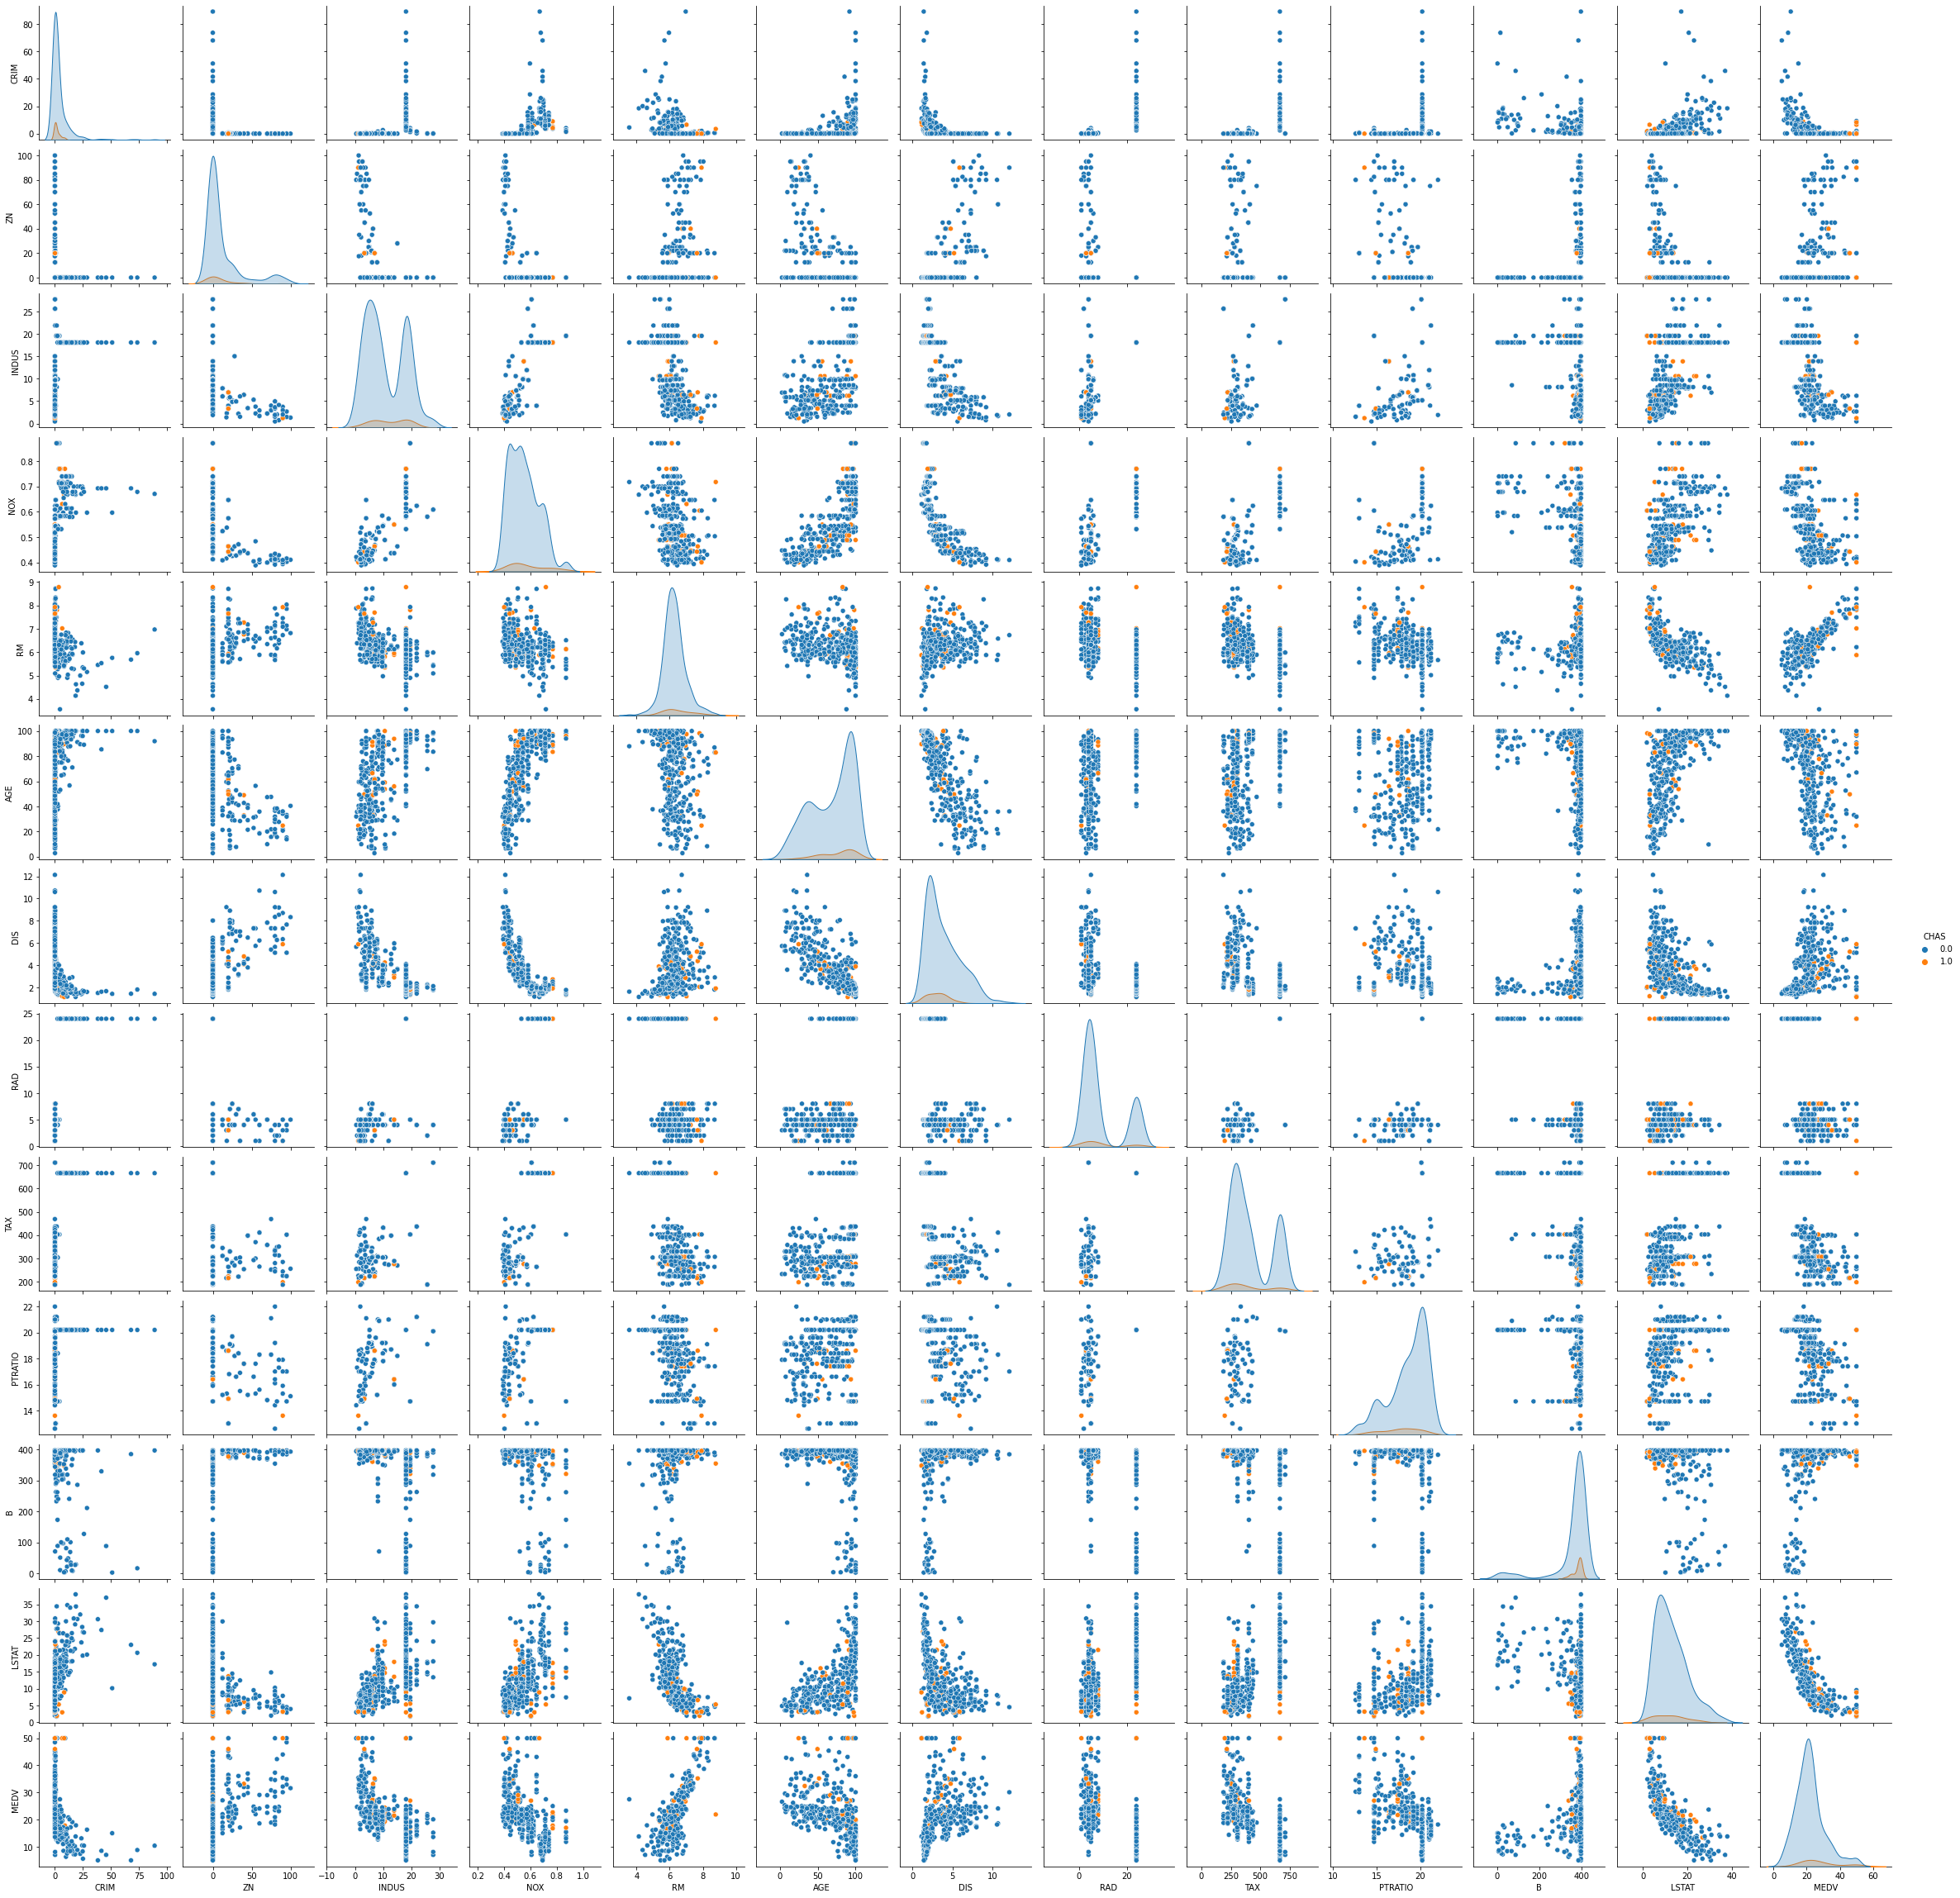

In [19]:
sns.pairplot(boston,hue='CHAS');

# Standardize dataframes

In [168]:
def standardise(x:pd.DataFrame, dtypes:dict):
    '''zero mean and unit variance'''
    numerical = x.iloc[:, dtypes['numeric']]
    categorical = x.iloc[:, dtypes['categorical']]
    # split into numecical and categorical features
    cols = x.columns[dtypes['numeric']]
    sc = StandardScaler(copy=False)
    x = sc.fit_transform(numerical)
    numerical = pd.DataFrame(x, columns=cols)

    on = OneHotEncoder()
    categoricalf = on.fit_transform(categorical).toarray()
    columns_f = on.get_feature_names_out()
    categorical = pd.DataFrame(categoricalf, columns=columns_f)

    return numerical, categorical 

# Create pytorch dataloaders

In [171]:
class Boston(Dataset):
    """Bank dataset"""

    def __init__(self, mode='train', transforms=None):
        boston_dtype = {'numeric': [0, 1, 2, 4,5,6,7,8,9,10,11,12,13], 
                      'categorical': [3],
                       'binary': [3]}
        data = pd.read_csv('datasets/boston.csv')
        if mode == 'train':
            self.data_num, self.data_cat = standardise(data.iloc[:300], boston_dtype)
        elif mode == 'val':
            self.data_num, self.data_cat = standardise(data.iloc[300:350], boston_dtype)
        else:
            self.data_num, self.data_cat = standardise(data.iloc[350:], boston_dtype)
        # self.transforms = transforms

    def __len__(self):
        return len(self.data_num)

    def __getitem__(self, idx):
        sample_num = list(self.data_num.iloc[idx].values) # is list necessary?
        sample_cat = list(self.data_cat.iloc[idx].values) # is list necessary?
        # if self.transforms:
        #     sample = self.transforms(sample)
        return sample_num,sample_cat

In [172]:
train_data = Boston(mode='train')
val_data = Boston(mode='val')
test_data = Boston(mode='test')

training_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
tester_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [173]:
next(iter(tester_loader))

[[tensor([0.2099], dtype=torch.float64),
  tensor([0.], dtype=torch.float64),
  tensor([0.1699], dtype=torch.float64),
  tensor([1.8092], dtype=torch.float64),
  tensor([0.6157], dtype=torch.float64),
  tensor([0.7742], dtype=torch.float64),
  tensor([-0.5398], dtype=torch.float64),
  tensor([0.7506], dtype=torch.float64),
  tensor([0.5150], dtype=torch.float64),
  tensor([0.3044], dtype=torch.float64),
  tensor([0.3215], dtype=torch.float64),
  tensor([0.3611], dtype=torch.float64),
  tensor([-0.5394], dtype=torch.float64)],
 [tensor([1.], dtype=torch.float64)]]